In [225]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import math
import glob
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [226]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

In [227]:
'''
        Each file contains nine columns and a different number of rows depending on the test length.
        
        1st column is the acceleration data in the X axis measured by the sensor ADXL345.
        2nd column is the acceleration data in the Y axis measured by the sensor ADXL345.
        3rd column is the acceleration data in the Z axis measured by the sensor ADXL345.

        4th column is the rotation data in the X axis measured by the sensor ITG3200.
        5th column is the rotation data in the Y axis measured by the sensor ITG3200.
        6th column is the rotation data in the Z axis measured by the sensor ITG3200.

        7th column is the acceleration data in the X axis measured by the sensor MMA8451Q.
        8th column is the acceleration data in the Y axis measured by the sensor MMA8451Q.
        9th column is the acceleration data in the Z axis measured by the sensor MMA8451Q.
        
        Data are in bits with the following characteristics:

        ADXL345:
        Resolution: 13 bits
        Range: +-16g

        ITG3200
        Resolution: 16 bits
        Range: +-2000°/s

        MMA8451Q:
        Resolution: 14 bits
        Range: +-8g
'''

'\n        Each file contains nine columns and a different number of rows depending on the test length.\n        \n        1st column is the acceleration data in the X axis measured by the sensor ADXL345.\n        2nd column is the acceleration data in the Y axis measured by the sensor ADXL345.\n        3rd column is the acceleration data in the Z axis measured by the sensor ADXL345.\n\n        4th column is the rotation data in the X axis measured by the sensor ITG3200.\n        5th column is the rotation data in the Y axis measured by the sensor ITG3200.\n        6th column is the rotation data in the Z axis measured by the sensor ITG3200.\n\n        7th column is the acceleration data in the X axis measured by the sensor MMA8451Q.\n        8th column is the acceleration data in the Y axis measured by the sensor MMA8451Q.\n        9th column is the acceleration data in the Z axis measured by the sensor MMA8451Q.\n        \n        Data are in bits with the following characteristics:\

In [228]:
datapath = "./data/SisFall.csv"

df = pd.read_csv(datapath, index_col=0)
df.head(10)

,ADXL_x,ADXL_y,ADXL_z,ITG_x,ITG_y,ITG_z,MMA_x,MMA_y,MMA_z,subject,activity,trial
NaN,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,SA01,D01,R01
0.0,17.0,-179.0,-99.0,-18.0,-504.0,-352.0,76.0,-697.0,-279.0,SA01,D01,R01
1.0,15.0,-174.0,-90.0,-53.0,-568.0,-306.0,48.0,-675.0,-254.0,SA01,D01,R01
2.0,1.0,-176.0,-81.0,-84.0,-613.0,-271.0,-2.0,-668.0,-221.0,SA01,D01,R01
3.0,-10.0,-180.0,-77.0,-104.0,-647.0,-227.0,-34.0,-697.0,-175.0,SA01,D01,R01
4.0,-21.0,-191.0,-63.0,-128.0,-675.0,-191.0,-74.0,-741.0,-133.0,SA01,D01,R01
5.0,-37.0,-225.0,-59.0,-146.0,-700.0,-159.0,-110.0,-840.0,-103.0,SA01,D01,R01
6.0,-36.0,-243.0,-46.0,-166.0,-722.0,-131.0,-147.0,-948.0,-75.0,SA01,D01,R01
7.0,-44.0,-271.0,-38.0,-190.0,-738.0,-107.0,-171.0,-1073.0,-38.0,SA01,D01,R01
8.0,-51.0,-312.0,-33.0,-210.0,-752.0,-90.0,-200.0,-1191.0,3.0,SA01,D01,R01


In [229]:
print (df.columns)
print (set(df['subject']))
features = df.copy()

# dnum = 200
# fnum = 365

Index(['ADXL_x', 'ADXL_y', 'ADXL_z', 'ITG_x', 'ITG_y', 'ITG_z', 'MMA_x',
       'MMA_y', 'MMA_z', 'subject', 'activity', 'trial'],
      dtype='object')
{'SA21', 'SE08', 'SA23', 'SE14', 'SE12', 'SA19', 'SA07', 'SA20', 'SA22', 'SE03', 'SE11', 'SE01', 'SA17', 'SA02', 'SA08', 'SA04', 'SA09', 'SA13', 'SE15', 'SE05', 'SE07', 'SE10', 'SE06', 'SE09', 'SA12', 'SA14', 'SA06', 'SE13', 'SA16', 'SE02', 'SA10', 'SE04', 'SA15', 'SA05', 'SA11', 'SA03', 'SA01', 'SA18'}


In [230]:
D01 = features[(features['activity']=='D01') & (features['subject']=='SA01')].copy()
D02 = features[(features['activity']=='D02') & (features['subject']=='SA01')].copy()
D03 = features[(features['activity']=='D03') & (features['subject']=='SA01')].copy()
D04 = features[(features['activity']=='D04') & (features['subject']=='SA01')].copy()
D05 = features[(features['activity']=='D05') & (features['subject']=='SA01')].copy()
D06 = features[(features['activity']=='D06') & (features['subject']=='SA01')].copy()
D07 = features[(features['activity']=='D07') & (features['subject']=='SA01')].copy()
D08 = features[(features['activity']=='D08') & (features['subject']=='SA01')].copy()
D09 = features[(features['activity']=='D09') & (features['subject']=='SA01')].copy()
D10 = features[(features['activity']=='D10') & (features['subject']=='SA01')].copy()
D11 = features[(features['activity']=='D11') & (features['subject']=='SA01')].copy()
D12 = features[(features['activity']=='D12') & (features['subject']=='SA01')].copy()
D13 = features[(features['activity']=='D13') & (features['subject']=='SA01')].copy()
D14 = features[(features['activity']=='D14') & (features['subject']=='SA01')].copy()
D15 = features[(features['activity']=='D15') & (features['subject']=='SA01')].copy()
D16 = features[(features['activity']=='D16') & (features['subject']=='SA01')].copy()
D17 = features[(features['activity']=='D17') & (features['subject']=='SA01')].copy()
D18 = features[(features['activity']=='D18') & (features['subject']=='SA01')].copy()
D19 = features[(features['activity']=='D19') & (features['subject']=='SA01')].copy()

In [231]:
F01 = features[(features['activity']=='F01') & (features['subject']=='SA01')].copy()
F02 = features[(features['activity']=='F02') & (features['subject']=='SA01')].copy()
F03 = features[(features['activity']=='F03') & (features['subject']=='SA01')].copy()
F04 = features[(features['activity']=='F04') & (features['subject']=='SA01')].copy()
F05 = features[(features['activity']=='F05') & (features['subject']=='SA01')].copy()
F06 = features[(features['activity']=='F06') & (features['subject']=='SA01')].copy()
F07 = features[(features['activity']=='F07') & (features['subject']=='SA01')].copy()
F08 = features[(features['activity']=='F08') & (features['subject']=='SA01')].copy()
F09 = features[(features['activity']=='F09') & (features['subject']=='SA01')].copy()
F10 = features[(features['activity']=='F10') & (features['subject']=='SA01')].copy()
F11 = features[(features['activity']=='F11') & (features['subject']=='SA01')].copy()
F12 = features[(features['activity']=='F12') & (features['subject']=='SA01')].copy()
F13 = features[(features['activity']=='F13') & (features['subject']=='SA01')].copy()
F14 = features[(features['activity']=='F14') & (features['subject']=='SA01')].copy()
F15 = features[(features['activity']=='F15') & (features['subject']=='SA01')].copy()

In [232]:
df = pd.DataFrame()
df = pd.concat([df, F01, F02, F03, F04, F05, F06, F07, F08, F09, F10, F11, F12, F13, F14, F15])
df = pd.concat([df, D01, D02, D03, D04, D05, D06, D07, D08, D09, D10, D11, D15, D16, D17, D18, D19])

In [233]:
df['activity'].value_counts()

activity
D06    25005
D05    25005
D17    25004
D04    20001
D03    20001
D02    20001
D01    20000
F13    15005
F02    15005
F15    15005
F14    15005
F01    15005
F12    15005
F10    15005
F09    15005
F08    15005
F07    15005
F04    15005
F11    15005
F03    15005
F06    15004
F05    15004
D15    12005
D18    12005
D16    12005
D07    12005
D11    12005
D10    12005
D09    12005
D08    12005
D19    12005
Name: count, dtype: int64

In [234]:
features = df.copy()

In [235]:
features = features.replace({'activity':'D01'},0)
features = features.replace({'activity':'D01'},0)
features = features.replace({'activity':'D02'},0)
features = features.replace({'activity':'D03'},0)
features = features.replace({'activity':'D04'},0)
features = features.replace({'activity':'D05'},0)
features = features.replace({'activity':'D06'},0)
features = features.replace({'activity':'D07'},0)
features = features.replace({'activity':'D08'},0)
features = features.replace({'activity':'D09'},0)
features = features.replace({'activity':'D10'},0)
features = features.replace({'activity':'D11'},0)
features = features.replace({'activity':'D12'},0)
features = features.replace({'activity':'D13'},0)
features = features.replace({'activity':'D14'},0)
features = features.replace({'activity':'D15'},0)
features = features.replace({'activity':'D16'},0)
features = features.replace({'activity':'D17'},0)
features = features.replace({'activity':'D18'},0)
features = features.replace({'activity':'D19'},0)
features = features.replace({'activity':'F01'},1)
features = features.replace({'activity':'F02'},1)
features = features.replace({'activity':'F03'},1)
features = features.replace({'activity':'F04'},1)
features = features.replace({'activity':'F05'},1)
features = features.replace({'activity':'F06'},1)
features = features.replace({'activity':'F07'},1)
features = features.replace({'activity':'F08'},1)
features = features.replace({'activity':'F09'},1)
features = features.replace({'activity':'F10'},1)
features = features.replace({'activity':'F11'},1)
features = features.replace({'activity':'F12'},1)
features = features.replace({'activity':'F13'},1)
features = features.replace({'activity':'F14'},1)
features = features.replace({'activity':'F15'},1)
features = features.replace({'activity':'F15'},1)

/var/folders/_z/gryfr07n59jgb3wrd062h1ym0000gn/T/ipykernel_8708/4220643108.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  features = features.replace({'activity':'F15'},1)


In [236]:
features['activity'].value_counts()

activity
0    263062
1    225073
Name: count, dtype: int64

In [237]:
features

,ADXL_x,ADXL_y,ADXL_z,ITG_x,ITG_y,ITG_z,MMA_x,MMA_y,MMA_z,subject,activity,trial
NaN,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,SA01,1,R01
0.0,-9.0,-257.0,-25.0,84.0,247.0,27.0,-120.0,-987.0,63.0,SA01,1,R01
1.0,-3.0,-263.0,-23.0,99.0,258.0,35.0,-110.0,-1016.0,68.0,SA01,1,R01
2.0,-1.0,-270.0,-22.0,114.0,272.0,45.0,-94.0,-1037.0,69.0,SA01,1,R01
3.0,1.0,-277.0,-24.0,127.0,286.0,57.0,-81.0,-1062.0,69.0,SA01,1,R01
...,...,...,...,...,...,...,...,...,...,...,...,...
2395.0,5.0,-258.0,-67.0,-36.0,-5.0,-5.0,2.0,-1002.0,-144.0,SA01,0,R05
2396.0,1.0,-260.0,-67.0,-37.0,-5.0,-6.0,-5.0,-1000.0,-143.0,SA01,0,R05
2397.0,-2.0,-258.0,-67.0,-37.0,-5.0,-7.0,-8.0,-1003.0,-142.0,SA01,0,R05
2398.0,1.0,-258.0,-66.0,-38.0,-5.0,-6.0,4.0,-1002.0,-143.0,SA01,0,R05


In [238]:
print (set(features['subject']))

{'SA01'}


In [239]:
features = features[[ft for ft in features.columns if ft not in ['subject', 'trial']]]
print(features.columns)

Index(['ADXL_x', 'ADXL_y', 'ADXL_z', 'ITG_x', 'ITG_y', 'ITG_z', 'MMA_x',
       'MMA_y', 'MMA_z', 'activity'],
      dtype='object')


In [240]:
from sklearn.preprocessing import StandardScaler

feature_columns = [col for col in features.columns if col != 'activity']

scaler = StandardScaler()

features_scaled = features.copy()
features_scaled[feature_columns] = scaler.fit_transform(features[feature_columns])

In [241]:
adl_count = features_scaled['activity'].value_counts()[0]
fall_count = features_scaled['activity'].value_counts()[1]

adl_mask = features_scaled['activity'] == 0
adl_data = features_scaled[adl_mask]
adl1 = adl_data.iloc[:int(adl_count * 0.6)]
adl2 = adl_data.iloc[int(adl_count * 0.6):]

fall_mask = features_scaled['activity'] == 1
fall_data = features_scaled[fall_mask]
fall1 = fall_data.iloc[:int(fall_count * 0.6)]
fall2 = fall_data.iloc[int(fall_count * 0.6):]

print(adl1.shape, adl2.shape, fall1.shape, fall2.shape)

(157837, 10) (105225, 10) (135043, 10) (90030, 10)


In [242]:
def split_sequences(sequences, n_steps, stride):
    X, y = [], []
    for i in range(0, len(sequences) - n_steps + 1, stride):
        end_ix = i + n_steps
        
        seq_x = sequences.iloc[i:end_ix].iloc[:, :-1]  
        seq_y = sequences.iloc[end_ix-1].iloc[-1]      
        
        X.append(seq_x.values)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

In [243]:
WINDOW_LENGTH = 100
STRIDE = 25
train_data, train_labels = split_sequences(adl1, 
                                           WINDOW_LENGTH, 
                                          STRIDE)
print (f"after train(only adl) : {train_data.shape}")
print (train_labels.shape)

normal_test_data, normal_test_labels = split_sequences(adl2, 
                                                       WINDOW_LENGTH, 
                                                       STRIDE)
abnormal_test_data, abnormal_test_labels = split_sequences(fall2, 
                                                           WINDOW_LENGTH,
                                                           STRIDE)
print (f"after test adl(normal) : {normal_test_data.shape, normal_test_labels.shape}")
print (f"after test fall(abnormal) : {abnormal_test_data.shape, abnormal_test_labels.shape}")

after train(only adl) : (6310, 100, 9)
(6310,)
after test adl(normal) : ((4206, 100, 9), (4206,))
after test fall(abnormal) : ((3598, 100, 9), (3598,))


----

In [244]:
EPOCHS = 200
INITIAL_LEARNING_RATE = 1e-4  
DECAY_STEPS = 1000  
DECAY_RATE = 0.98  
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
BATCH_SIZE = 32

In [245]:
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()
        middle_channels = out_channels // 2
        self.conv = nn.Sequential(
            nn.Conv1d(in_channels, middle_channels, kernel_size=2, padding='same'),
            nn.BatchNorm1d(middle_channels),
            nn.ReLU(),
            nn.Conv1d(middle_channels, out_channels, kernel_size=2, padding='same'),
            nn.BatchNorm1d(out_channels),   
            nn.ReLU()
        )
    def forward(self, x):
        return self.conv(x)

In [246]:
class SinusoidalPositionEmbeddings(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.dim = dim

    def forward(self, time):
        device = time.device
        half_dim = self.dim // 2
        embeddings = math.log(10000) / (half_dim - 1)
        embeddings = torch.exp(torch.arange(half_dim, device=device) * -embeddings)
        embeddings = time[:, None] * embeddings[None, :]
        embeddings = torch.cat((embeddings.sin(), embeddings.cos()), dim=-1)
        return embeddings

In [247]:
class CNNFeatureExtractor(nn.Module):
    def __init__(self, in_channels=9):
        super().__init__()
        self.inc = nn.Sequential(
            nn.Conv1d(in_channels, 64, kernel_size=3, padding='same'),
            nn.BatchNorm1d(64),
            nn.GELU()
        )
        
        self.down1 = nn.Sequential(
            nn.Conv1d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm1d(128),
            nn.GELU()
        )
        
        self.down2 = nn.Sequential(
            nn.Conv1d(128, 256, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm1d(256),
            nn.GELU()
        )

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        return x3, (x1, x2)

class TransformerEncoder(nn.Module):
    def __init__(self, embed_dim=256, num_heads=8, num_layers=4):
        super().__init__()
        self.layers = nn.ModuleList([
            nn.TransformerEncoderLayer(
                d_model=embed_dim,
                nhead=num_heads,
                dim_feedforward=embed_dim*4,
                dropout=0.1,
                batch_first=True
            ) for _ in range(num_layers)
        ])
        
        self.pos_embedding = nn.Parameter(torch.zeros(1, 100//4, embed_dim))

    def forward(self, x):
        B, C, L = x.shape
        x = x.transpose(1, 2)
        x = x + self.pos_embedding
        
        for layer in self.layers:
            x = layer(x)
            
        return x.transpose(1, 2)

class TransUNet1D(nn.Module):
    def __init__(self, in_channels=9):
        super().__init__()
        self.cnn_encoder = CNNFeatureExtractor(in_channels)
        self.transformer = TransformerEncoder(embed_dim=256)
        
        self.time_embed = nn.Sequential(
            SinusoidalPositionEmbeddings(256),
            nn.Linear(256, 256),
            nn.GELU(),
            nn.Linear(256, 256)
        )
        
        # Decoder
        self.up2 = nn.Sequential(
            nn.ConvTranspose1d(256, 128, kernel_size=2, stride=2),
            DoubleConv(256, 128)  # 256 because of skip connection
        )
        
        self.up1 = nn.Sequential(
            nn.ConvTranspose1d(128, 64, kernel_size=2, stride=2),
            DoubleConv(128, 64)   # 128 because of skip connection
        )
        
        self.final_conv = nn.Conv1d(64, in_channels, kernel_size=1)
        
    def forward(self, x, t):
        # Time embedding
        t_emb = self.time_embed(t)
        
        # CNN features
        features, skip_connections = self.cnn_encoder(x)
        x1, x2 = skip_connections
        
        # Add time information
        features = features + t_emb.unsqueeze(-1)
        
        # Transformer encoding
        features = self.transformer(features)
        
        # Decoder with skip connections
        x = self.up2[0](features)
        x = torch.cat([x, x2], dim=1)
        x = self.up2[1](x)
        
        x = self.up1[0](x)
        x = torch.cat([x, x1], dim=1)
        x = self.up1[1](x)
        
        return self.final_conv(x)

In [248]:
class DDPM:
    def __init__(self, num_timesteps=200): 
        self.num_timesteps = num_timesteps
        # Cosine schedule
        betas = torch.linspace(-6, 6, num_timesteps)
        betas = torch.sigmoid(betas) * (0.5e-2 - 1e-4) + 1e-4
        self.betas = betas
        self.alphas = 1. - self.betas
        self.alphas_cumprod = torch.cumprod(self.alphas, dim=0)
        
    def q_sample(self, x_0, t):
        """
        Forward diffusion process: q(x_t | x_0)
        Samples from q(x_t | x_0) = N(x_t; √(αₜ)x₀, (1-αₜ)I)
        """
        sqrt_alphas_cumprod = torch.sqrt(self.alphas_cumprod[t])[:, None, None]
        sqrt_one_minus_alphas_cumprod = torch.sqrt(1. - self.alphas_cumprod[t])[:, None, None]
        epsilon = torch.randn_like(x_0)
        return sqrt_alphas_cumprod * x_0 + sqrt_one_minus_alphas_cumprod * epsilon, epsilon
    
    def sample_t(self, batch_size):
        """
        Uniformly sample timesteps t
        """
        return torch.randint(0, self.num_timesteps, (batch_size,))
        
    def p_sample(self, model, batch_size, device, shape):
        """
        Reverse diffusion process: p_θ(x_{t-1} | x_t)
        Generate samples using the reverse process
        """
        model.eval()
        with torch.no_grad():
            x_t = torch.randn(batch_size, *shape).to(device)
            
            for t in reversed(range(1, self.num_timesteps)):
                time_tensor = torch.ones(batch_size, dtype=torch.long).to(device) * t
                
                # Predict noise
                predicted_noise = model(x_t, time_tensor)
                
                alpha = self.alphas[t][:, None, None]
                alpha_cumprod = self.alphas_cumprod[t][:, None, None]
                beta = self.betas[t][:, None, None]
                
                # Add noise for stochasticity
                noise = torch.randn_like(x_t)
                
                # Compute mean for p_θ(x_{t-1} | x_t)
                x_t = 1 / torch.sqrt(alpha) * (
                    x_t - (1 - alpha) / torch.sqrt(1 - alpha_cumprod) * predicted_noise
                ) + torch.sqrt(beta) * noise
                
        model.train()
        return x_t

In [249]:
def train_ddpm(model, train_loader, ddpm, optimizer, scheduler, num_epochs, device):
    model.train()
    
    for epoch in range(num_epochs):
        epoch_loss = 0
        n_batches = len(train_loader)
        
        for batch in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}'):
            x_0 = batch.to(device)
            batch_size = x_0.shape[0]
            
            optimizer.zero_grad()
            t = ddpm.sample_t(batch_size).to(device)
            x_t, epsilon = ddpm.q_sample(x_0, t)
            epsilon_theta = model(x_t, t)
            loss = F.mse_loss(epsilon_theta, epsilon)
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
        
        scheduler.step()
        avg_loss = epoch_loss / n_batches
        print(f'Epoch {epoch+1}/{num_epochs} - Avg Loss: {avg_loss:.4f}')

In [252]:
model = TransUNet1D().to(device)
ddpm = DDPM(num_timesteps=100)  
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=0.01)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS)

print("Train data shape:", train_data.shape)

train_dataset = SisFallDataset(train_data)
sample_data = train_dataset[0]
print("Dataset sample shape:", sample_data.shape)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE)
first_batch = next(iter(train_loader))
print("Batch shape:", first_batch.shape)

train_ddpm(
    model=model,
    train_loader=train_loader,
    ddpm=ddpm,
    optimizer=optimizer,
    scheduler=scheduler,
    num_epochs=EPOCHS,
    device=device
)

Train data shape: (6310, 100, 9)
Dataset sample shape: torch.Size([9, 100])
Batch shape: torch.Size([32, 9, 100])


Epoch 1/200: 100%|████████████████████████████| 198/198 [00:33<00:00,  5.90it/s]


Epoch 1/200 - Avg Loss: 0.9393


Epoch 2/200: 100%|████████████████████████████| 198/198 [00:43<00:00,  4.57it/s]


Epoch 2/200 - Avg Loss: 0.6990


Epoch 3/200: 100%|████████████████████████████| 198/198 [00:43<00:00,  4.50it/s]


Epoch 3/200 - Avg Loss: 0.5590


Epoch 4/200: 100%|████████████████████████████| 198/198 [00:36<00:00,  5.45it/s]


Epoch 4/200 - Avg Loss: 0.4828


Epoch 5/200: 100%|████████████████████████████| 198/198 [00:29<00:00,  6.66it/s]


Epoch 5/200 - Avg Loss: 0.4376


Epoch 6/200: 100%|████████████████████████████| 198/198 [00:29<00:00,  6.75it/s]


Epoch 6/200 - Avg Loss: 0.4033


Epoch 7/200: 100%|████████████████████████████| 198/198 [00:29<00:00,  6.65it/s]


Epoch 7/200 - Avg Loss: 0.3815


Epoch 8/200: 100%|████████████████████████████| 198/198 [00:29<00:00,  6.68it/s]


Epoch 8/200 - Avg Loss: 0.3678


Epoch 9/200: 100%|████████████████████████████| 198/198 [00:33<00:00,  5.88it/s]


Epoch 9/200 - Avg Loss: 0.3494


Epoch 10/200: 100%|███████████████████████████| 198/198 [00:36<00:00,  5.47it/s]


Epoch 10/200 - Avg Loss: 0.3357


Epoch 11/200: 100%|███████████████████████████| 198/198 [00:34<00:00,  5.76it/s]


Epoch 11/200 - Avg Loss: 0.3240


Epoch 12/200: 100%|███████████████████████████| 198/198 [00:34<00:00,  5.81it/s]


Epoch 12/200 - Avg Loss: 0.3115


Epoch 13/200: 100%|███████████████████████████| 198/198 [00:35<00:00,  5.61it/s]


Epoch 13/200 - Avg Loss: 0.3056


Epoch 14/200: 100%|███████████████████████████| 198/198 [00:32<00:00,  6.13it/s]


Epoch 14/200 - Avg Loss: 0.2974


Epoch 15/200: 100%|███████████████████████████| 198/198 [00:31<00:00,  6.34it/s]


Epoch 15/200 - Avg Loss: 0.2948


Epoch 16/200: 100%|███████████████████████████| 198/198 [00:41<00:00,  4.76it/s]


Epoch 16/200 - Avg Loss: 0.2896


Epoch 17/200: 100%|███████████████████████████| 198/198 [00:41<00:00,  4.73it/s]


Epoch 17/200 - Avg Loss: 0.2839


Epoch 18/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.84it/s]


Epoch 18/200 - Avg Loss: 0.2730


Epoch 19/200: 100%|███████████████████████████| 198/198 [00:30<00:00,  6.40it/s]


Epoch 19/200 - Avg Loss: 0.2717


Epoch 20/200: 100%|███████████████████████████| 198/198 [00:30<00:00,  6.52it/s]


Epoch 20/200 - Avg Loss: 0.2676


Epoch 21/200: 100%|███████████████████████████| 198/198 [00:30<00:00,  6.45it/s]


Epoch 21/200 - Avg Loss: 0.2653


Epoch 22/200: 100%|███████████████████████████| 198/198 [00:30<00:00,  6.57it/s]


Epoch 22/200 - Avg Loss: 0.2678


Epoch 23/200: 100%|███████████████████████████| 198/198 [00:30<00:00,  6.59it/s]


Epoch 23/200 - Avg Loss: 0.2647


Epoch 24/200: 100%|███████████████████████████| 198/198 [00:30<00:00,  6.59it/s]


Epoch 24/200 - Avg Loss: 0.2576


Epoch 25/200: 100%|███████████████████████████| 198/198 [00:31<00:00,  6.23it/s]


Epoch 25/200 - Avg Loss: 0.2547


Epoch 26/200: 100%|███████████████████████████| 198/198 [00:31<00:00,  6.20it/s]


Epoch 26/200 - Avg Loss: 0.2497


Epoch 27/200: 100%|███████████████████████████| 198/198 [00:32<00:00,  6.19it/s]


Epoch 27/200 - Avg Loss: 0.2545


Epoch 28/200: 100%|███████████████████████████| 198/198 [00:32<00:00,  6.14it/s]


Epoch 28/200 - Avg Loss: 0.2470


Epoch 29/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.91it/s]


Epoch 29/200 - Avg Loss: 0.2460


Epoch 30/200: 100%|███████████████████████████| 198/198 [00:34<00:00,  5.70it/s]


Epoch 30/200 - Avg Loss: 0.2432


Epoch 31/200: 100%|███████████████████████████| 198/198 [00:32<00:00,  6.07it/s]


Epoch 31/200 - Avg Loss: 0.2399


Epoch 32/200: 100%|███████████████████████████| 198/198 [00:32<00:00,  6.06it/s]


Epoch 32/200 - Avg Loss: 0.2498


Epoch 33/200: 100%|███████████████████████████| 198/198 [00:31<00:00,  6.24it/s]


Epoch 33/200 - Avg Loss: 0.2386


Epoch 34/200: 100%|███████████████████████████| 198/198 [00:31<00:00,  6.25it/s]


Epoch 34/200 - Avg Loss: 0.2382


Epoch 35/200: 100%|███████████████████████████| 198/198 [00:32<00:00,  6.08it/s]


Epoch 35/200 - Avg Loss: 0.2377


Epoch 36/200: 100%|███████████████████████████| 198/198 [00:31<00:00,  6.26it/s]


Epoch 36/200 - Avg Loss: 0.2333


Epoch 37/200: 100%|███████████████████████████| 198/198 [00:31<00:00,  6.28it/s]


Epoch 37/200 - Avg Loss: 0.2338


Epoch 38/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.83it/s]


Epoch 38/200 - Avg Loss: 0.2339


Epoch 39/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.88it/s]


Epoch 39/200 - Avg Loss: 0.2327


Epoch 40/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.97it/s]


Epoch 40/200 - Avg Loss: 0.2340


Epoch 41/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  6.00it/s]


Epoch 41/200 - Avg Loss: 0.2315


Epoch 42/200: 100%|███████████████████████████| 198/198 [00:34<00:00,  5.81it/s]


Epoch 42/200 - Avg Loss: 0.2304


Epoch 43/200: 100%|███████████████████████████| 198/198 [00:36<00:00,  5.50it/s]


Epoch 43/200 - Avg Loss: 0.2263


Epoch 44/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.90it/s]


Epoch 44/200 - Avg Loss: 0.2296


Epoch 45/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.94it/s]


Epoch 45/200 - Avg Loss: 0.2270


Epoch 46/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.98it/s]


Epoch 46/200 - Avg Loss: 0.2255


Epoch 47/200: 100%|███████████████████████████| 198/198 [00:36<00:00,  5.41it/s]


Epoch 47/200 - Avg Loss: 0.2296


Epoch 48/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.83it/s]


Epoch 48/200 - Avg Loss: 0.2245


Epoch 49/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.89it/s]


Epoch 49/200 - Avg Loss: 0.2223


Epoch 50/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.91it/s]


Epoch 50/200 - Avg Loss: 0.2197


Epoch 51/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.96it/s]


Epoch 51/200 - Avg Loss: 0.2245


Epoch 52/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.94it/s]


Epoch 52/200 - Avg Loss: 0.2211


Epoch 53/200: 100%|███████████████████████████| 198/198 [00:32<00:00,  6.03it/s]


Epoch 53/200 - Avg Loss: 0.2243


Epoch 54/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.90it/s]


Epoch 54/200 - Avg Loss: 0.2208


Epoch 55/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.96it/s]


Epoch 55/200 - Avg Loss: 0.2178


Epoch 56/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.94it/s]


Epoch 56/200 - Avg Loss: 0.2210


Epoch 57/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.91it/s]


Epoch 57/200 - Avg Loss: 0.2179


Epoch 58/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.87it/s]


Epoch 58/200 - Avg Loss: 0.2181


Epoch 59/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.99it/s]


Epoch 59/200 - Avg Loss: 0.2139


Epoch 60/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.91it/s]


Epoch 60/200 - Avg Loss: 0.2180


Epoch 61/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.97it/s]


Epoch 61/200 - Avg Loss: 0.2143


Epoch 62/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.96it/s]


Epoch 62/200 - Avg Loss: 0.2157


Epoch 63/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.88it/s]


Epoch 63/200 - Avg Loss: 0.2163


Epoch 64/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.92it/s]


Epoch 64/200 - Avg Loss: 0.2169


Epoch 65/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.91it/s]


Epoch 65/200 - Avg Loss: 0.2141


Epoch 66/200: 100%|███████████████████████████| 198/198 [00:32<00:00,  6.02it/s]


Epoch 66/200 - Avg Loss: 0.2128


Epoch 67/200: 100%|███████████████████████████| 198/198 [00:34<00:00,  5.76it/s]


Epoch 67/200 - Avg Loss: 0.2121


Epoch 68/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.90it/s]


Epoch 68/200 - Avg Loss: 0.2118


Epoch 69/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.86it/s]


Epoch 69/200 - Avg Loss: 0.2125


Epoch 70/200: 100%|███████████████████████████| 198/198 [00:35<00:00,  5.59it/s]


Epoch 70/200 - Avg Loss: 0.2099


Epoch 71/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.90it/s]


Epoch 71/200 - Avg Loss: 0.2112


Epoch 72/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.91it/s]


Epoch 72/200 - Avg Loss: 0.2126


Epoch 73/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.87it/s]


Epoch 73/200 - Avg Loss: 0.2102


Epoch 74/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.94it/s]


Epoch 74/200 - Avg Loss: 0.2078


Epoch 75/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.86it/s]


Epoch 75/200 - Avg Loss: 0.2068


Epoch 76/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.87it/s]


Epoch 76/200 - Avg Loss: 0.2073


Epoch 77/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.88it/s]


Epoch 77/200 - Avg Loss: 0.2108


Epoch 78/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.94it/s]


Epoch 78/200 - Avg Loss: 0.2111


Epoch 79/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.87it/s]


Epoch 79/200 - Avg Loss: 0.2087


Epoch 80/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.97it/s]


Epoch 80/200 - Avg Loss: 0.2118


Epoch 81/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.99it/s]


Epoch 81/200 - Avg Loss: 0.2074


Epoch 82/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.90it/s]


Epoch 82/200 - Avg Loss: 0.2019


Epoch 83/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.89it/s]


Epoch 83/200 - Avg Loss: 0.2084


Epoch 84/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  6.00it/s]


Epoch 84/200 - Avg Loss: 0.2041


Epoch 85/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.94it/s]


Epoch 85/200 - Avg Loss: 0.2029


Epoch 86/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.94it/s]


Epoch 86/200 - Avg Loss: 0.2066


Epoch 87/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.98it/s]


Epoch 87/200 - Avg Loss: 0.2077


Epoch 88/200: 100%|███████████████████████████| 198/198 [00:35<00:00,  5.61it/s]


Epoch 88/200 - Avg Loss: 0.2023


Epoch 89/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.90it/s]


Epoch 89/200 - Avg Loss: 0.2030


Epoch 90/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.84it/s]


Epoch 90/200 - Avg Loss: 0.2027


Epoch 91/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.94it/s]


Epoch 91/200 - Avg Loss: 0.2049


Epoch 92/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.86it/s]


Epoch 92/200 - Avg Loss: 0.2013


Epoch 93/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.88it/s]


Epoch 93/200 - Avg Loss: 0.2037


Epoch 94/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.87it/s]


Epoch 94/200 - Avg Loss: 0.2024


Epoch 95/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.96it/s]


Epoch 95/200 - Avg Loss: 0.2032


Epoch 96/200: 100%|███████████████████████████| 198/198 [00:37<00:00,  5.21it/s]


Epoch 96/200 - Avg Loss: 0.1983


Epoch 97/200: 100%|███████████████████████████| 198/198 [00:34<00:00,  5.79it/s]


Epoch 97/200 - Avg Loss: 0.2011


Epoch 98/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.98it/s]


Epoch 98/200 - Avg Loss: 0.2042


Epoch 99/200: 100%|███████████████████████████| 198/198 [00:33<00:00,  5.90it/s]


Epoch 99/200 - Avg Loss: 0.2060


Epoch 100/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.87it/s]


Epoch 100/200 - Avg Loss: 0.1992


Epoch 101/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.83it/s]


Epoch 101/200 - Avg Loss: 0.1998


Epoch 102/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.84it/s]


Epoch 102/200 - Avg Loss: 0.1999


Epoch 103/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.85it/s]


Epoch 103/200 - Avg Loss: 0.1996


Epoch 104/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.93it/s]


Epoch 104/200 - Avg Loss: 0.1981


Epoch 105/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.85it/s]


Epoch 105/200 - Avg Loss: 0.2010


Epoch 106/200: 100%|██████████████████████████| 198/198 [00:37<00:00,  5.28it/s]


Epoch 106/200 - Avg Loss: 0.2014


Epoch 107/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.96it/s]


Epoch 107/200 - Avg Loss: 0.1981


Epoch 108/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.86it/s]


Epoch 108/200 - Avg Loss: 0.1983


Epoch 109/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.84it/s]


Epoch 109/200 - Avg Loss: 0.1979


Epoch 110/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.87it/s]


Epoch 110/200 - Avg Loss: 0.1974


Epoch 111/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.91it/s]


Epoch 111/200 - Avg Loss: 0.2028


Epoch 112/200: 100%|██████████████████████████| 198/198 [00:34<00:00,  5.77it/s]


Epoch 112/200 - Avg Loss: 0.1984


Epoch 113/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.91it/s]


Epoch 113/200 - Avg Loss: 0.1992


Epoch 114/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.94it/s]


Epoch 114/200 - Avg Loss: 0.1955


Epoch 115/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.92it/s]


Epoch 115/200 - Avg Loss: 0.1963


Epoch 116/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.95it/s]


Epoch 116/200 - Avg Loss: 0.1989


Epoch 117/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.95it/s]


Epoch 117/200 - Avg Loss: 0.2007


Epoch 118/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.93it/s]


Epoch 118/200 - Avg Loss: 0.1953


Epoch 119/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.94it/s]


Epoch 119/200 - Avg Loss: 0.1977


Epoch 120/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.85it/s]


Epoch 120/200 - Avg Loss: 0.1952


Epoch 121/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.87it/s]


Epoch 121/200 - Avg Loss: 0.1954


Epoch 122/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.93it/s]


Epoch 122/200 - Avg Loss: 0.1984


Epoch 123/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.94it/s]


Epoch 123/200 - Avg Loss: 0.1953


Epoch 124/200: 100%|██████████████████████████| 198/198 [00:35<00:00,  5.53it/s]


Epoch 124/200 - Avg Loss: 0.1973


Epoch 125/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.95it/s]


Epoch 125/200 - Avg Loss: 0.1936


Epoch 126/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.93it/s]


Epoch 126/200 - Avg Loss: 0.1935


Epoch 127/200: 100%|██████████████████████████| 198/198 [00:34<00:00,  5.79it/s]


Epoch 127/200 - Avg Loss: 0.1950


Epoch 128/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.95it/s]


Epoch 128/200 - Avg Loss: 0.1961


Epoch 129/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.94it/s]


Epoch 129/200 - Avg Loss: 0.1964


Epoch 130/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.91it/s]


Epoch 130/200 - Avg Loss: 0.1918


Epoch 131/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.83it/s]


Epoch 131/200 - Avg Loss: 0.1968


Epoch 132/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.88it/s]


Epoch 132/200 - Avg Loss: 0.1956


Epoch 133/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.91it/s]


Epoch 133/200 - Avg Loss: 0.1928


Epoch 134/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.83it/s]


Epoch 134/200 - Avg Loss: 0.1967


Epoch 135/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.97it/s]


Epoch 135/200 - Avg Loss: 0.1920


Epoch 136/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.89it/s]


Epoch 136/200 - Avg Loss: 0.1943


Epoch 137/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.96it/s]


Epoch 137/200 - Avg Loss: 0.1959


Epoch 138/200: 100%|██████████████████████████| 198/198 [00:34<00:00,  5.81it/s]


Epoch 138/200 - Avg Loss: 0.1911


Epoch 139/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.98it/s]


Epoch 139/200 - Avg Loss: 0.1936


Epoch 140/200: 100%|██████████████████████████| 198/198 [00:37<00:00,  5.30it/s]


Epoch 140/200 - Avg Loss: 0.1947


Epoch 141/200: 100%|██████████████████████████| 198/198 [00:34<00:00,  5.75it/s]


Epoch 141/200 - Avg Loss: 0.1914


Epoch 142/200: 100%|██████████████████████████| 198/198 [00:35<00:00,  5.58it/s]


Epoch 142/200 - Avg Loss: 0.1942


Epoch 143/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.88it/s]


Epoch 143/200 - Avg Loss: 0.1933


Epoch 144/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.95it/s]


Epoch 144/200 - Avg Loss: 0.1924


Epoch 145/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.88it/s]


Epoch 145/200 - Avg Loss: 0.1932


Epoch 146/200: 100%|██████████████████████████| 198/198 [00:35<00:00,  5.61it/s]


Epoch 146/200 - Avg Loss: 0.1900


Epoch 147/200: 100%|██████████████████████████| 198/198 [00:34<00:00,  5.69it/s]


Epoch 147/200 - Avg Loss: 0.1916


Epoch 148/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.84it/s]


Epoch 148/200 - Avg Loss: 0.1892


Epoch 149/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.92it/s]


Epoch 149/200 - Avg Loss: 0.1950


Epoch 150/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.85it/s]


Epoch 150/200 - Avg Loss: 0.1897


Epoch 151/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.96it/s]


Epoch 151/200 - Avg Loss: 0.1953


Epoch 152/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.85it/s]


Epoch 152/200 - Avg Loss: 0.1973


Epoch 153/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.93it/s]


Epoch 153/200 - Avg Loss: 0.1926


Epoch 154/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.88it/s]


Epoch 154/200 - Avg Loss: 0.1899


Epoch 155/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.96it/s]


Epoch 155/200 - Avg Loss: 0.1924


Epoch 156/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.87it/s]


Epoch 156/200 - Avg Loss: 0.1917


Epoch 157/200: 100%|██████████████████████████| 198/198 [00:34<00:00,  5.77it/s]


Epoch 157/200 - Avg Loss: 0.1936


Epoch 158/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.85it/s]


Epoch 158/200 - Avg Loss: 0.1946


Epoch 159/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.94it/s]


Epoch 159/200 - Avg Loss: 0.1906


Epoch 160/200: 100%|██████████████████████████| 198/198 [00:35<00:00,  5.62it/s]


Epoch 160/200 - Avg Loss: 0.1906


Epoch 161/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.86it/s]


Epoch 161/200 - Avg Loss: 0.1939


Epoch 162/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.83it/s]


Epoch 162/200 - Avg Loss: 0.1937


Epoch 163/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.87it/s]


Epoch 163/200 - Avg Loss: 0.1932


Epoch 164/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.83it/s]


Epoch 164/200 - Avg Loss: 0.1915


Epoch 165/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.90it/s]


Epoch 165/200 - Avg Loss: 0.1904


Epoch 166/200: 100%|██████████████████████████| 198/198 [00:34<00:00,  5.77it/s]


Epoch 166/200 - Avg Loss: 0.1921


Epoch 167/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.87it/s]


Epoch 167/200 - Avg Loss: 0.1915


Epoch 168/200: 100%|██████████████████████████| 198/198 [00:34<00:00,  5.69it/s]


Epoch 168/200 - Avg Loss: 0.1886


Epoch 169/200: 100%|██████████████████████████| 198/198 [00:36<00:00,  5.36it/s]


Epoch 169/200 - Avg Loss: 0.1921


Epoch 170/200: 100%|██████████████████████████| 198/198 [00:36<00:00,  5.48it/s]


Epoch 170/200 - Avg Loss: 0.1920


Epoch 171/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.83it/s]


Epoch 171/200 - Avg Loss: 0.1906


Epoch 172/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.85it/s]


Epoch 172/200 - Avg Loss: 0.1921


Epoch 173/200: 100%|██████████████████████████| 198/198 [00:34<00:00,  5.77it/s]


Epoch 173/200 - Avg Loss: 0.1912


Epoch 174/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.90it/s]


Epoch 174/200 - Avg Loss: 0.1916


Epoch 175/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.84it/s]


Epoch 175/200 - Avg Loss: 0.1890


Epoch 176/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.88it/s]


Epoch 176/200 - Avg Loss: 0.1916


Epoch 177/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.87it/s]


Epoch 177/200 - Avg Loss: 0.1928


Epoch 178/200: 100%|██████████████████████████| 198/198 [00:35<00:00,  5.58it/s]


Epoch 178/200 - Avg Loss: 0.1901


Epoch 179/200: 100%|██████████████████████████| 198/198 [00:34<00:00,  5.82it/s]


Epoch 179/200 - Avg Loss: 0.1915


Epoch 180/200: 100%|██████████████████████████| 198/198 [00:34<00:00,  5.77it/s]


Epoch 180/200 - Avg Loss: 0.1895


Epoch 181/200: 100%|██████████████████████████| 198/198 [00:34<00:00,  5.80it/s]


Epoch 181/200 - Avg Loss: 0.1917


Epoch 182/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.85it/s]


Epoch 182/200 - Avg Loss: 0.1920


Epoch 183/200: 100%|██████████████████████████| 198/198 [00:34<00:00,  5.76it/s]


Epoch 183/200 - Avg Loss: 0.1923


Epoch 184/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.88it/s]


Epoch 184/200 - Avg Loss: 0.1928


Epoch 185/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.99it/s]


Epoch 185/200 - Avg Loss: 0.1895


Epoch 186/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.85it/s]


Epoch 186/200 - Avg Loss: 0.1886


Epoch 187/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.90it/s]


Epoch 187/200 - Avg Loss: 0.1911


Epoch 188/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.97it/s]


Epoch 188/200 - Avg Loss: 0.1873


Epoch 189/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.89it/s]


Epoch 189/200 - Avg Loss: 0.1943


Epoch 190/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.98it/s]


Epoch 190/200 - Avg Loss: 0.1915


Epoch 191/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.89it/s]


Epoch 191/200 - Avg Loss: 0.1907


Epoch 192/200: 100%|██████████████████████████| 198/198 [00:32<00:00,  6.03it/s]


Epoch 192/200 - Avg Loss: 0.1870


Epoch 193/200: 100%|██████████████████████████| 198/198 [00:33<00:00,  5.90it/s]


Epoch 193/200 - Avg Loss: 0.1929


Epoch 194/200: 100%|██████████████████████████| 198/198 [00:32<00:00,  6.05it/s]


Epoch 194/200 - Avg Loss: 0.1910


Epoch 195/200: 100%|██████████████████████████| 198/198 [00:37<00:00,  5.24it/s]


Epoch 195/200 - Avg Loss: 0.1915


Epoch 196/200: 100%|██████████████████████████| 198/198 [00:54<00:00,  3.65it/s]


Epoch 196/200 - Avg Loss: 0.1912


Epoch 197/200: 100%|██████████████████████████| 198/198 [00:47<00:00,  4.18it/s]


Epoch 197/200 - Avg Loss: 0.1889


Epoch 198/200: 100%|██████████████████████████| 198/198 [00:43<00:00,  4.57it/s]


Epoch 198/200 - Avg Loss: 0.1911


Epoch 199/200: 100%|██████████████████████████| 198/198 [00:42<00:00,  4.70it/s]


Epoch 199/200 - Avg Loss: 0.1895


Epoch 200/200: 100%|██████████████████████████| 198/198 [00:41<00:00,  4.79it/s]

Epoch 200/200 - Avg Loss: 0.1920


------

In [253]:
class SisFallDataset(Dataset):
    def __init__(self, data):
        # Transpose data from [batch, window_length, features] to [batch, features, window_length]
        data = data.transpose(0, 2, 1)
        self.data = torch.FloatTensor(data)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]  # Returns shape [features, window_length]

In [254]:
def detect_anomalies(model, ddpm, data_loader, device, threshold=None):
    model.eval()
    anomaly_scores = []

    with torch.no_grad():
        for batch in data_loader:
            x_0 = batch.to(device)
            batch_size = x_0.shape[0]

            t = ddpm.sample_t(batch_size).to(device)

            x_t, epsilon = ddpm.q_sample(x_0, t)

            epsilon_theta = model(x_t, t)

            # MSE Loss (Anomaly Score)
            loss = F.mse_loss(epsilon_theta, epsilon, reduction='none')
            loss = loss.mean(dim=(1, 2)) 
            anomaly_scores.extend(loss.cpu().numpy())  

    if threshold is None:
        threshold = np.percentile(anomaly_scores, 95)

    anomalies = [score > threshold for score in anomaly_scores]

    return anomalies, anomaly_scores, threshold


In [255]:
normal_dataset = SisFallDataset(normal_test_data)
normal_loader = DataLoader(normal_dataset, batch_size=BATCH_SIZE)

abnormal_dataset = SisFallDataset(abnormal_test_data)
abnormal_loader = DataLoader(abnormal_dataset, batch_size=BATCH_SIZE)

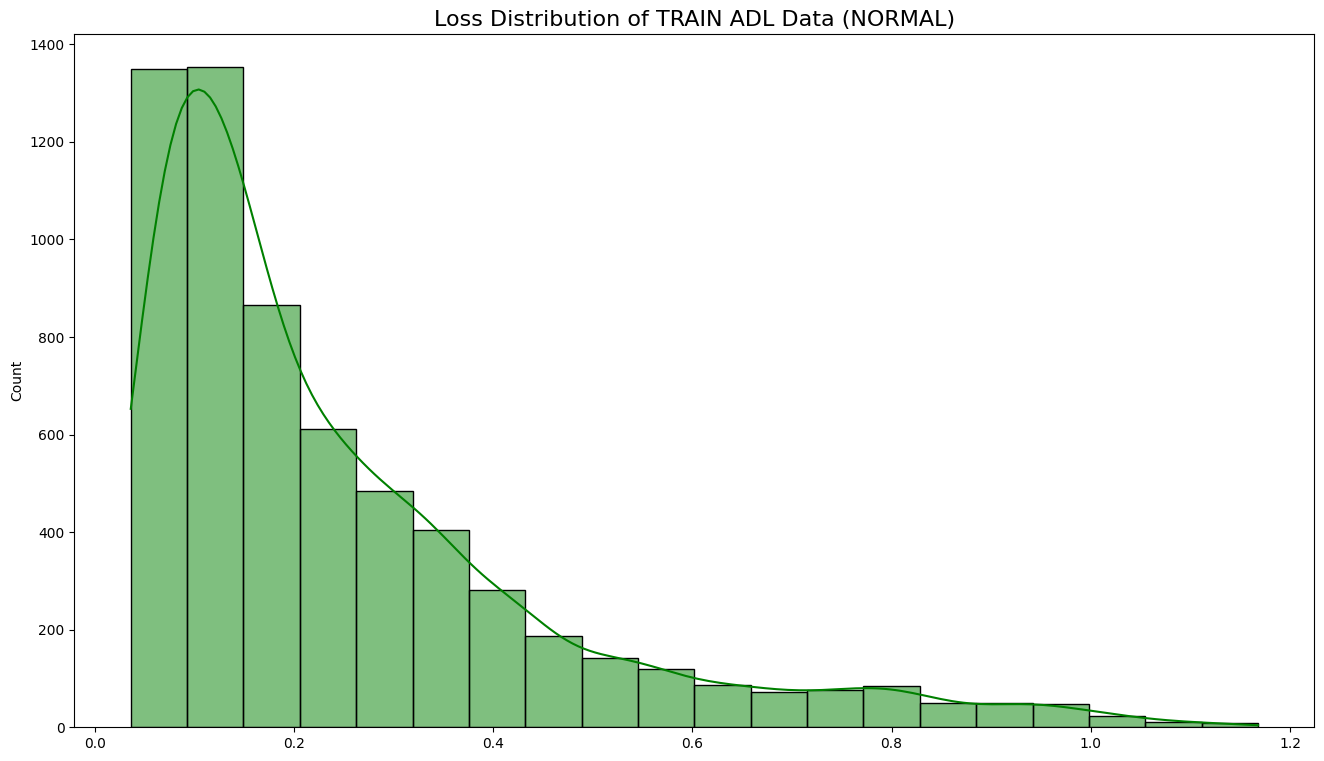

In [256]:
train_dataset = SisFallDataset(train_data)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE)

train_anomalies, train_scores, _ = detect_anomalies(model, ddpm, train_loader, device)

plt.figure(figsize=(16,9))
plt.title('Loss Distribution of TRAIN ADL Data (NORMAL)', fontsize=16)
sns.histplot(train_scores, bins=20, kde=True, color='green')
plt.show()

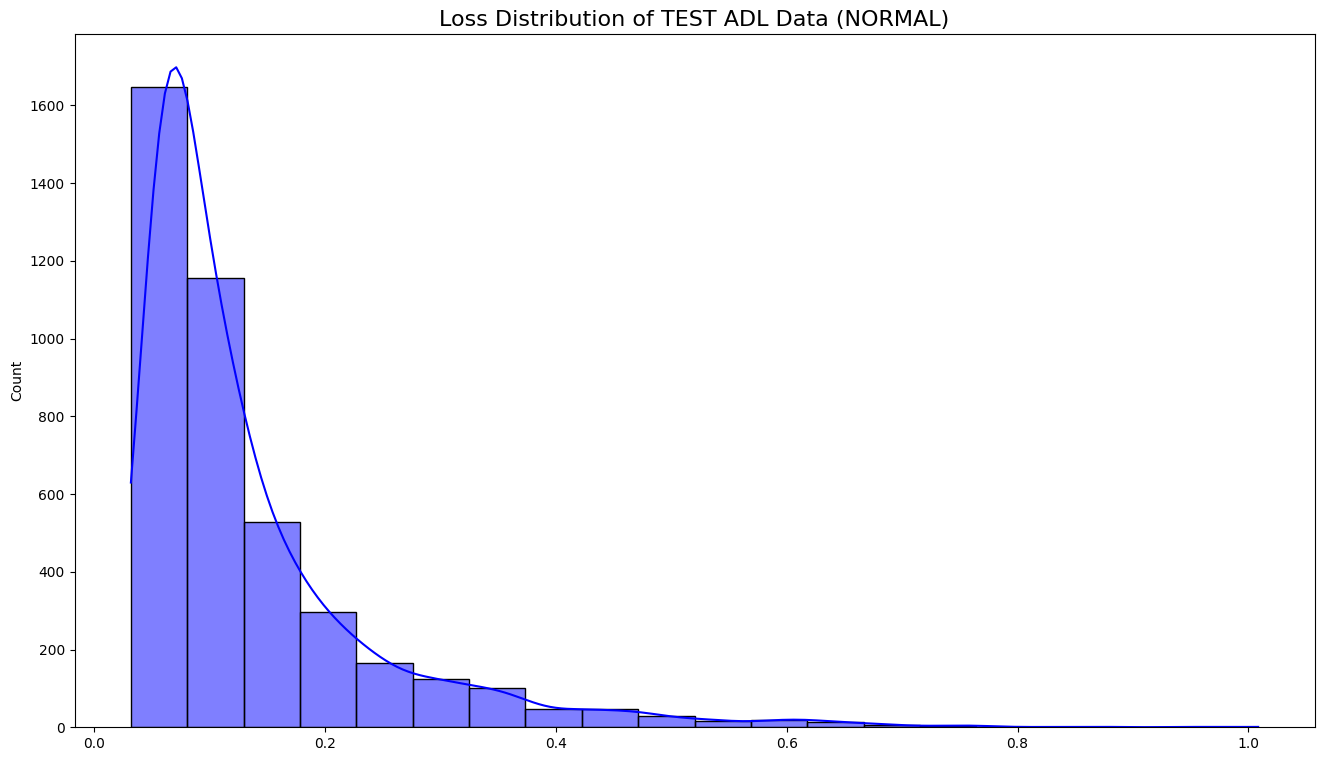

In [257]:
normal_anomalies, normal_scores, _ = detect_anomalies(model, ddpm, normal_loader, device)

plt.figure(figsize=(16,9))
plt.title('Loss Distribution of TEST ADL Data (NORMAL)', fontsize=16)
sns.histplot(normal_scores, bins=20, kde=True, color='blue')
plt.show()

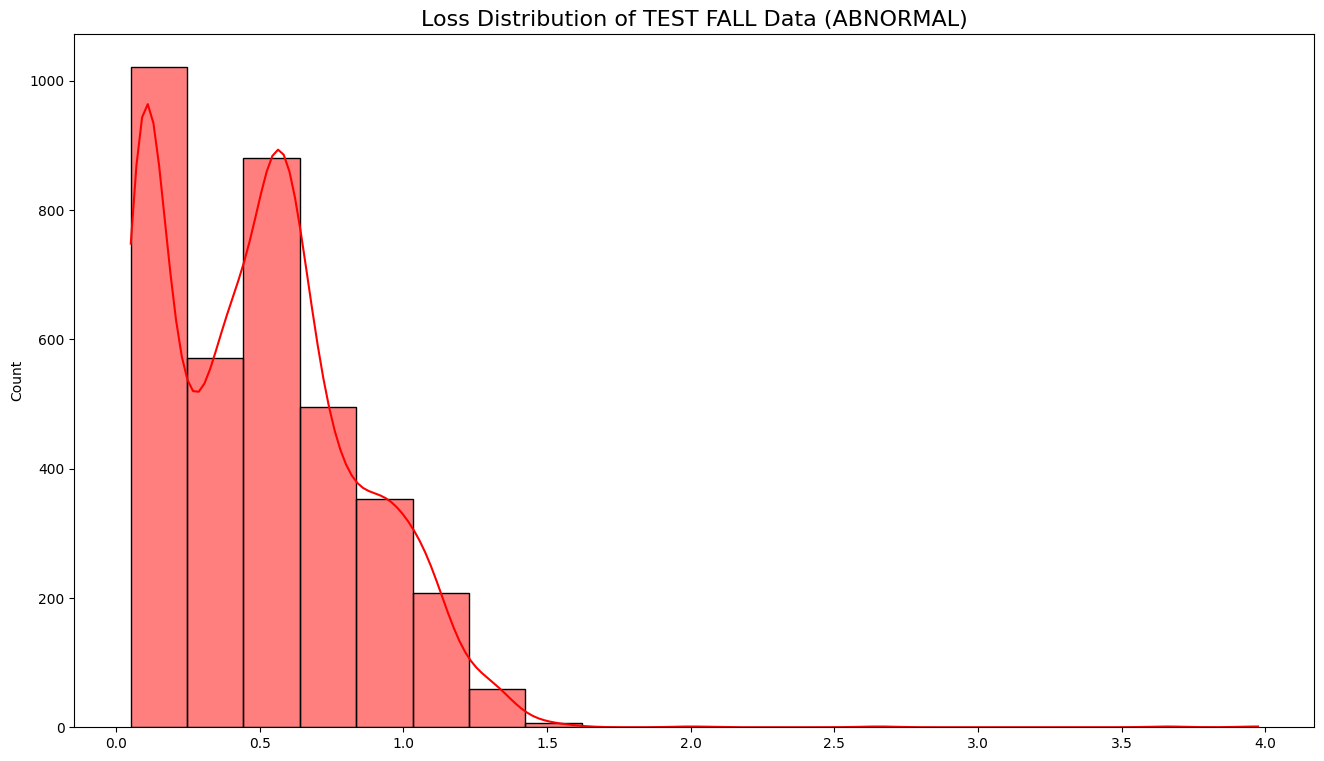

In [258]:
abnormal_anomalies, abnormal_scores, _ = detect_anomalies(model, ddpm, abnormal_loader, device)

plt.figure(figsize=(16,9))
plt.title('Loss Distribution of TEST FALL Data (ABNORMAL)', fontsize=16)
sns.histplot(abnormal_scores, bins=20, kde=True, color='red')
plt.show()

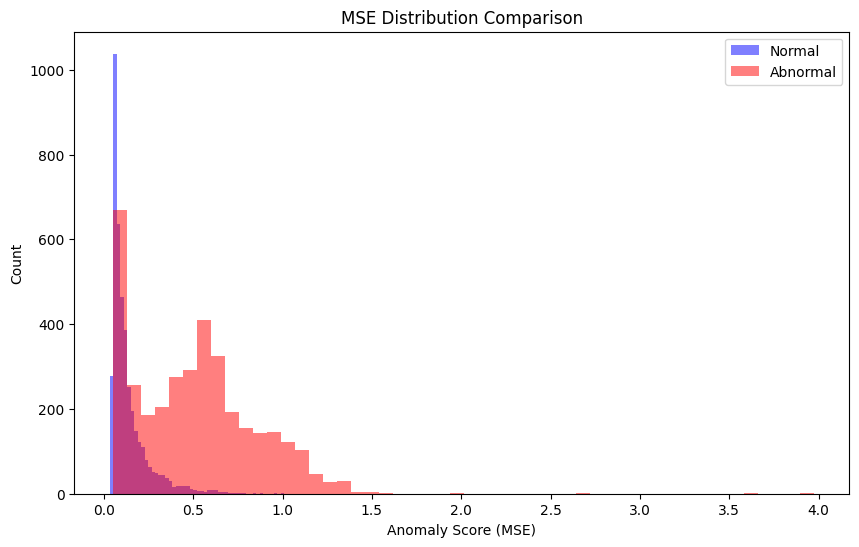

In [259]:
plt.figure(figsize=(10,6))
plt.title('MSE Distribution Comparison')
plt.hist(normal_scores, bins=50, alpha=0.5, color='blue', label='Normal')
plt.hist(abnormal_scores, bins=50, alpha=0.5, color='red', label='Abnormal')
plt.xlabel('Anomaly Score (MSE)')
plt.ylabel('Count')
plt.legend()
plt.show()

In [260]:
error_df = pd.DataFrame({
    'reconstruction_error': np.concatenate([normal_scores, abnormal_scores]),
    'true_class': np.concatenate([np.zeros(len(normal_scores)), np.ones(len(abnormal_scores))])
})

print ("error dataframe head : ")
print(error_df.head(10))
print ()
print ("error dataframe tail : ")
print(error_df.tail(10))
print ()
print(error_df.describe())
print ()
error_df['true_class'].value_counts()

error dataframe head : 
   reconstruction_error  true_class
0              0.279870         0.0
1              0.066212         0.0
2              0.066133         0.0
3              0.152151         0.0
4              0.191324         0.0
5              0.159161         0.0
6              0.337608         0.0
7              0.075243         0.0
8              0.295229         0.0
9              0.114728         0.0

error dataframe tail : 
      reconstruction_error  true_class
7794              0.660528         1.0
7795              0.540455         1.0
7796              0.607497         1.0
7797              0.663313         1.0
7798              0.612004         1.0
7799              0.664769         1.0
7800              0.622492         1.0
7801              0.669090         1.0
7802              0.628939         1.0
7803              0.644880         1.0

       reconstruction_error   true_class
count           7804.000000  7804.000000
mean               0.306676     0.461046
st

true_class
0.0    4206
1.0    3598
Name: count, dtype: int64

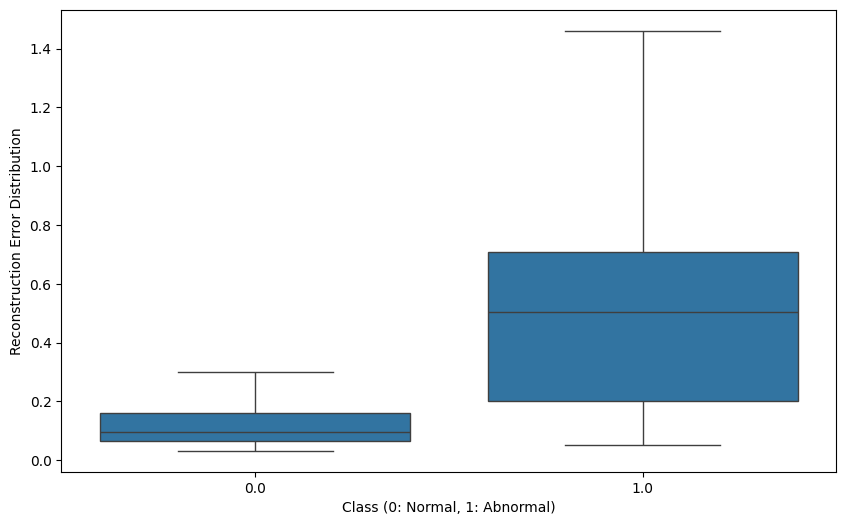

In [261]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='true_class', y='reconstruction_error', data=error_df, showfliers=False)
plt.ylabel('Reconstruction Error Distribution')
plt.xlabel('Class (0: Normal, 1: Abnormal)')
plt.show()

In [262]:
threshold = np.percentile(normal_scores, 95)

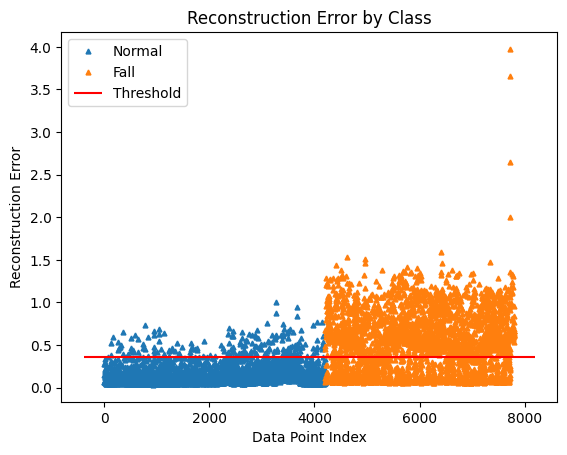

In [263]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='^', ms=3.5, linestyle='',
            label="Normal" if name == 0 else "Fall")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction Error by Class")
plt.ylabel("Reconstruction Error")
plt.xlabel("Data Point Index")
plt.show()

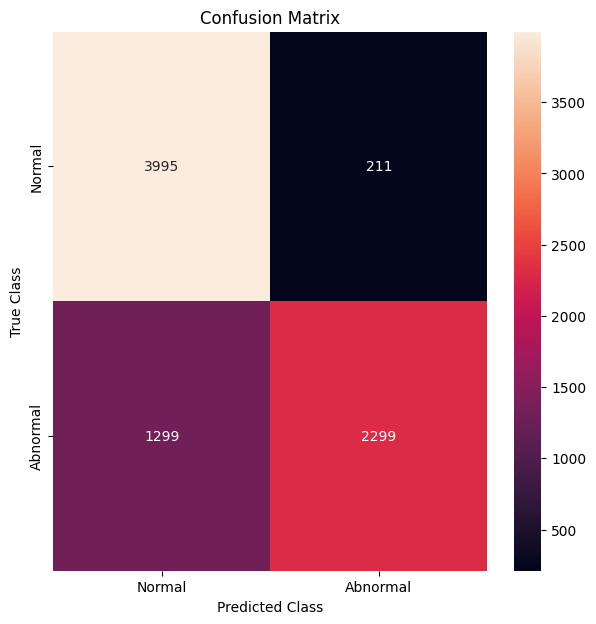

In [264]:
LABELS = ["Normal", "Abnormal"]
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(7, 7))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [265]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(error_df.true_class, y_pred, average='binary')
accuracy = accuracy_score(error_df.true_class, y_pred)

print('\nPerformance Metrics:')
print(f'Accuracy Score : {accuracy:.4f}')
print(f'Precision     : {precision:.4f}')
print(f'Recall        : {recall:.4f}')
print(f'F1 Score      : {f1:.4f}')


Performance Metrics:
Accuracy Score : 0.8065
Precision     : 0.9159
Recall        : 0.6390
F1 Score      : 0.7528
